In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'AMD', 'AMZN', 'ANET', 'APPH', 'AXON',
    'BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD', 'DDOG', 'DKNG',
    'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'FUV', 'FVRR', 'GH', 'GMED',
    'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU','MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NVCR', 'NVDA', 'NYT', 'OKTA', 'OPEN', 'PANW',
    'PINS', 'PTON', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'ROKU', 'SE',
    'SHOP', 'SPLK', 'SQ', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

67

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-04-09', datetime.date(2022, 4, 9))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  70 of 70 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...SE
   ...SHOP
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

2514   2022-04-04
2515   2022-04-05
2516   2022-04-06
2517   2022-04-07
2518   2022-04-08
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.982919
2       1.007449
3       1.013779
4       0.987525
5       0.999496
          ...   
2514    1.008091
2515    0.987448
2516    0.990283
2517    1.004253
2518    0.997349
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,0.982385
2,1.018057
3,1.021101
4,0.996709
5,0.999263
...,...
2514,1.056731
2515,0.983512
2516,0.977719
2517,1.008701


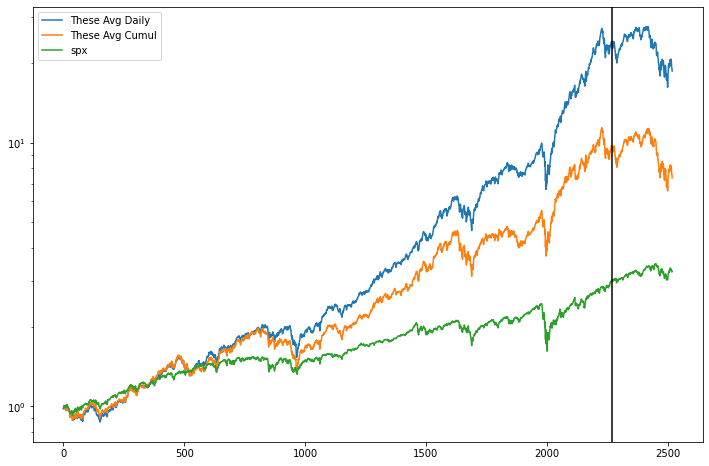

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-04-09,NaN,NaN
1,2012-04-10,0.980138,0.980138
2,2012-04-11,0.992842,0.992771
3,2012-04-12,1.006646,1.006509
4,2012-04-13,0.994967,0.994728


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-04-04,20.751611,8.175625
2515,2022-04-05,20.011166,7.902315
2516,2022-04-06,19.281924,7.588986
2517,2022-04-07,19.160761,7.575626
2518,2022-04-08,18.732501,7.354080


In [11]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

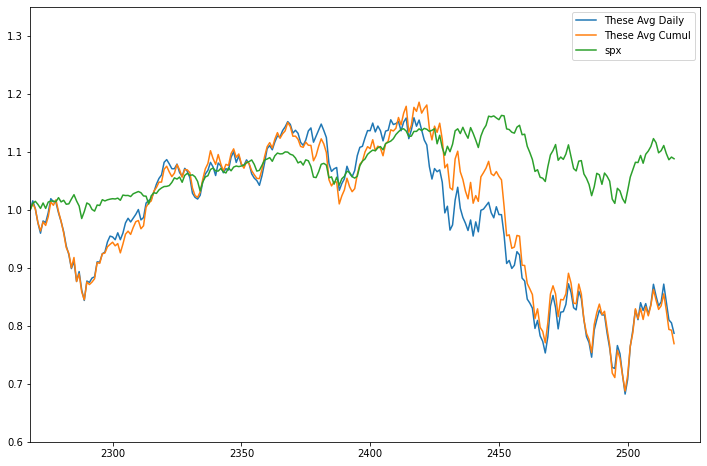

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.35)
plt.legend();

In [14]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1394,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1395,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1396,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1397,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1398,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1394,16.26,16.26,16.990,14.00
1395,15.26,15.26,16.399,15.12
1396,15.24,15.24,15.860,14.77
1397,13.73,13.73,15.430,13.62
1398,14.02,14.02,14.160,13.81


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1394,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1395,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1396,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1397,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1398,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.990256
Name: HighMult, dtype: float64


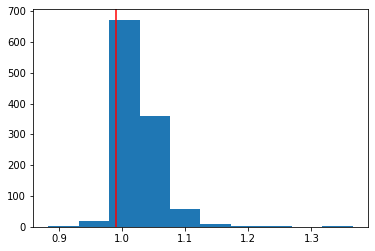

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0142744626883573


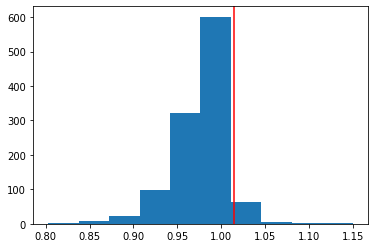

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0142744626883573, 0.9902561673520628)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0081230605115612, 0.99425264583669)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1394,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1395,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1396,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1397,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1398,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.011225723761703, 0.9910649410325463, 1.0174909304081967, 0.9879597764860499)

In [27]:
get_hilo_mults(aapl)

(1.006381552595269, 0.9957578700485552, 1.0094975894422156, 0.9928613717489103)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006382,0.995758,1.009498,0.992861
1,ABMD,1.004035,0.997422,1.004686,0.997085
2,ABNB,1.006765,0.994318,1.011701,0.984217
3,AMD,1.011525,0.992519,1.011541,0.991191
4,AMZN,1.005366,0.996585,1.008447,0.994329


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,170.089996,AAPL
ABMD,314.529999,ABMD
ABNB,162.559998,ABNB
AMD,101.0,AMD
AMZN,3089.209961,AMZN
...,...,...
ZEN,122.5,ZEN
ZNGA,9.02,ZNGA
^GSPC,4488.279785,^GSPC
^IXIC,13710.996094,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006382,0.995758,1.009498,0.992861,170.089996
1,ABMD,1.004035,0.997422,1.004686,0.997085,314.529999
2,ABNB,1.006765,0.994318,1.011701,0.984217,162.559998
3,AMD,1.011525,0.992519,1.011541,0.991191,101.0
4,AMZN,1.005366,0.996585,1.008447,0.994329,3089.209961


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv